# ISOMAP

## Spiegazione

L'assunzione di base che facciamo sui nostri dati è che, anche se essi sono rappresentati in uno spazio con molte dimensioni, al loro interno ci sia una struttura rappresentabile in uno spazio con molte meno dimensioni.

(01.png)

Abbiamo dei sample points in uno spazio ad alta dimensionalità e l'idea è di appiattirli per vederli in 2 dimensioni, buttando via tutte le altre dimensioni che non ci servono. Nell'appiattimento, inevitabilmente, in alcuni casi i dati vengono distorti.

(02.png)

Il nostro embedding, ottenuto "srotolando" il manifold, deve preservare le distanze che avevamo nel manifold.<br>
L'intuizione alla base di ISOMAP è che in small local regions le distanze intrinsiche fra sample points nel manifold corrispondono a quelle euclidee.<br>
Invece per sample points più lontani la distanza euclidea non è adatta a descrivere le distanze perchè percorrendo il manifold abbiamo una distanza maggiore fra sample points, detta geodesica.

(03.png)
(04.png)

Costruiamo un kNN graph connettendo ogni punto ai suoi k nearest neighbors e pesiamo gli archi con la distanza euclidea fra la coppia di punti.<br>
Per calcolare la distanza fra due punti basta calcolare lo shortest path che li connette sul grafo (ad esempio con l'algoritmo di Dijkstra o di Floyd-Warshall). La somma di tutti i pesi sugli archi del path trovato approssima bene la distanza geodesica fra i punti.

(05.png)

Dopo aver calcolato la distanza per ogni coppia di sample points posso usare metric MDS sulla matrice D delle distanze per embeddare i dati in una struttura a bassa dimensionalità che preservi le distanze geodesiche.



## Applicazione di ISOMAP al dataset di cifre MNIST

to-do:
    vedere come varia l'embedding al variare di k, magari fare un video con le immagini in sequenza

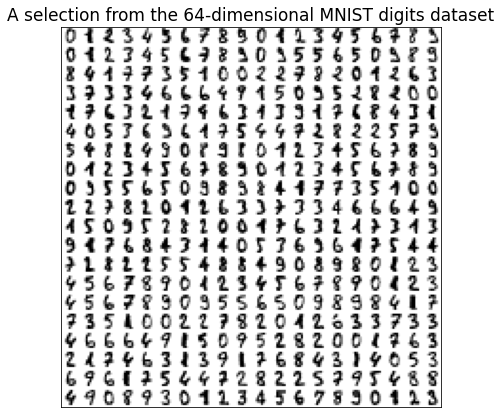

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
from time import time

digits = load_digits()
X = digits.data
y = digits.target
n_samples, n_features = X.shape
        
# Plot images of the digits
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.rcParams['figure.figsize'] = [7, 7]
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional MNIST digits dataset', fontsize=17);

... computing IsoMap embedding


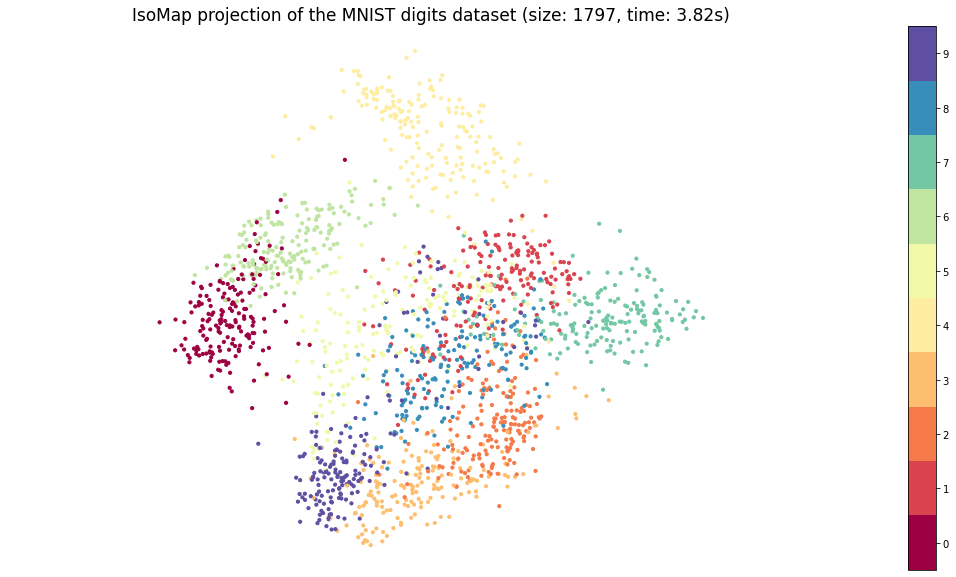

In [30]:
def scatterplot_digits(embedding, algorithm_name, time):
    plt.rcParams['figure.figsize'] = [19, 10]
    plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=10)
    plt.gca().set_aspect('equal', 'datalim')
    plt.axis('off') # ho tolto anche gli assi
    plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
    plt.title(f'{algorithm_name} projection of the MNIST digits dataset (size: {len(embedding)}, time: {round(time,2)}s)', fontsize=17);
    
print("... computing IsoMap embedding")
t0 = time()
X_iso = Isomap(n_neighbors=30, n_components=2).fit_transform(X)
scatterplot_digits(X_iso, 'IsoMap', time() - t0)

## Applicazione di ISOMAP a qualche altro dataset che troverò un giorno